# https://jaketae.github.io/study/genetic-algorithm/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

In [2]:
cities = [0, 1, 2, 3, 4]

adjacency_mat = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)

In [5]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat
def init_population(cities, adjacency_mat, n_population):
    return Population( np.asarray([np.random.permutation(cities) for _ in range(n_population)]), adjacency_mat )

In [6]:
pop = init_population(cities, adjacency_mat, 5)
pop.bag

array([[1, 4, 2, 0, 3],
       [3, 1, 2, 0, 4],
       [1, 0, 3, 4, 2],
       [0, 1, 2, 3, 4],
       [0, 2, 3, 1, 4]])

In [9]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate
pop.evaluate()

array([0.19370949, 0.21905217, 0.        , 0.17431729, 0.41292105])

In [10]:
pop.best

array([0, 2, 3, 1, 4])

In [11]:
pop.score

86.25

In [12]:
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select

In [13]:
pop.select()
pop.parents

array([[0, 2, 3, 1, 4],
       [0, 2, 3, 1, 4],
       [3, 1, 2, 0, 4],
       [0, 1, 2, 3, 4]])

In [14]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [15]:
def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover

In [17]:
def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

In [18]:
pop.mutate()

[[3, 1, 2, 0, 4],
 [0, 1, 2, 3, 4],
 [3, 1, 4, 0, 2],
 [3, 1, 2, 0, 4],
 [3, 1, 2, 0, 4]]

In [45]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=200,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [46]:
genetic_algorithm(cities, adjacency_mat, verbose=True)

Generation 0: 3117.7040247799728
Generation 1: 3112.671389459908
Generation 2: 3048.409867223676
Generation 3: 3048.409867223676
Generation 4: 3011.83634845628
Generation 5: 2989.616168361425
Generation 6: 2963.5442314211446
Generation 7: 2962.2205660521904
Generation 8: 2927.2234359479617
Generation 9: 2927.2234359479617
Generation 10: 2895.900529117907
Generation 11: 2827.3524052363555
Generation 12: 2749.5062668891237
Generation 13: 2749.5062668891237
Generation 14: 2653.699701517448
Generation 15: 2640.3665420595767
Generation 16: 2639.8166564090943
Generation 17: 2622.4051426042693
Generation 18: 2622.3148759923615
Generation 19: 2596.247816477058
Generation 20: 2596.247816477058
Generation 21: 2596.247816477058
Generation 22: 2557.5151478699363
Generation 23: 2557.5151478699363
Generation 24: 2557.5151478699363
Generation 25: 2501.7231927317557
Generation 26: 2501.7231927317557
Generation 27: 2486.622893844409
Generation 28: 2486.622893844409
Generation 29: 2486.622893844409
Gene

[31,
 39,
 32,
 35,
 38,
 47,
 19,
 16,
 17,
 13,
 12,
 24,
 95,
 89,
 83,
 80,
 77,
 58,
 36,
 30,
 27,
 3,
 8,
 29,
 33,
 40,
 42,
 43,
 51,
 54,
 96,
 84,
 86,
 65,
 62,
 97,
 99,
 94,
 56,
 57,
 59,
 61,
 63,
 66,
 67,
 90,
 88,
 87,
 91,
 82,
 81,
 78,
 4,
 0,
 98,
 85,
 79,
 64,
 49,
 28,
 23,
 22,
 34,
 74,
 71,
 70,
 68,
 53,
 60,
 72,
 73,
 76,
 75,
 69,
 6,
 2,
 7,
 50,
 52,
 55,
 48,
 9,
 5,
 1,
 10,
 18,
 92,
 93,
 37,
 20,
 21,
 26,
 11,
 14,
 15,
 41,
 44,
 46,
 45,
 25]

Generation 0: 3241.223693798883
Generation 20: 2675.2959833455584
Generation 40: 2239.164560502958
Generation 60: 2000.60285505911
Generation 80: 1821.6497629979253


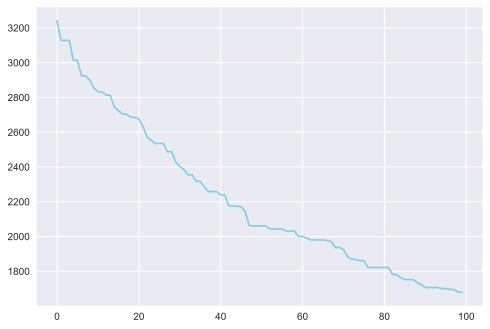

[95, 97, 59, 56, 53, 52, 37, 33, 50, 34, 63, 64, 61, 49, 20, 11, 5, 4, 12, 8, 79, 81, 93, 98, 99, 90, 91, 80, 69, 87, 65, 19, 16, 39, 57, 58, 66, 62, 47, 55, 60, 70, 94, 85, 75, 76, 71, 41, 30, 27, 15, 32, 21, 31, 35, 42, 44, 54, 68, 74, 86, 83, 67, 78, 96, 88, 84, 6, 36, 51, 82, 72, 89, 92, 1, 13, 14, 45, 48, 26, 23, 0, 24, 25, 18, 17, 10, 77, 73, 28, 29, 40, 46, 2, 3, 9, 7, 22, 43, 38]


In [47]:
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=100,
    verbose=False,
    print_interval=20,
    return_history=True,
)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)

# ประยุกต์ ให้เพิ่มจำนวนเมืองได้
# ตัวอย่างที่ 1 

In [25]:
def generate_cities(n_cities, factor=10):
    return np.random.rand(n_cities, 2) * n_cities * factor

def make_mat(coordinates):
    res = [
        [get_distance(city1, city2) for city2 in coordinates]
        for city1 in coordinates
    ]
    return np.asarray(res)

def get_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

In [26]:
test_coords = [[0, 0], [0, 1], [1, 1], [1, 0]]

make_mat(test_coords)

array([[0.        , 1.        , 1.41421356, 1.        ],
       [1.        , 0.        , 1.        , 1.41421356],
       [1.41421356, 1.        , 0.        , 1.        ],
       [1.        , 1.41421356, 1.        , 0.        ]])

In [27]:
generate_cities(5)

array([[15.51176419,  9.08817989],
       [25.2066421 , 16.14048967],
       [12.90538216, 23.19927087],
       [ 6.6642129 , 46.38728665],
       [43.3851049 , 35.38102929]])

Generation 0: 48052.936231772226
Generation 100: 34955.70114581155
Generation 200: 30121.949532042992
Generation 300: 28162.629720174486
Generation 400: 26030.117469754437
Generation 500: 25273.34321851981
Generation 600: 24055.00180800108
Generation 700: 23145.248757648365
Generation 800: 22433.008757364896
Generation 900: 21703.763621506423


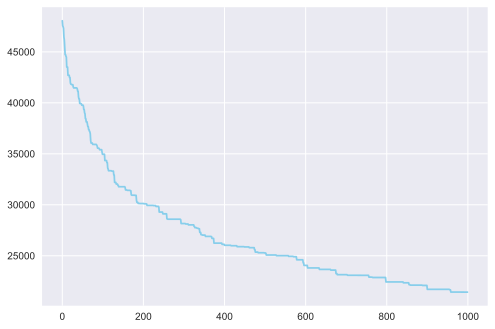

[18, 45, 29, 47, 35, 84, 22, 54, 95, 25, 91, 8, 90, 14, 34, 92, 0, 76, 27, 70, 13, 4, 46, 16, 82, 72, 42, 59, 94, 80, 69, 30, 32, 51, 58, 60, 99, 66, 56, 65, 64, 98, 49, 12, 68, 31, 23, 83, 96, 52, 87, 20, 38, 74, 5, 17, 50, 63, 2, 41, 62, 73, 89, 10, 48, 24, 9, 85, 28, 67, 11, 86, 1, 40, 57, 93, 33, 7, 53, 26, 21, 77, 37, 71, 97, 36, 78, 43, 55, 79, 75, 15, 3, 61, 6, 88, 19, 44, 39, 81]


In [39]:
cities = range(100)
city_coordinates = generate_cities(len(cities))
adjacency_mat = make_mat(city_coordinates)
best, history = genetic_algorithm(
    cities, adjacency_mat, n_population=20, n_iter=1000, verbose=False, return_history=True
)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)

In [40]:
def print_path(best, city_coordinates):
    points = city_coordinates[best]
    x, y = zip(*points)
    plt.plot(x, y, color="skyblue", marker="o")

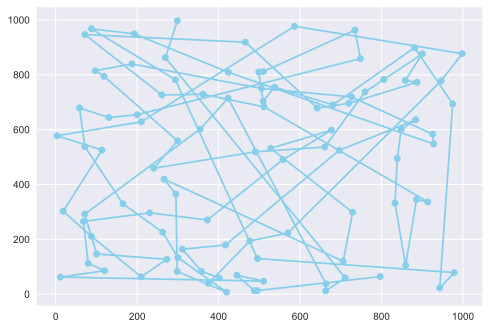

In [41]:
print_path(best, city_coordinates)

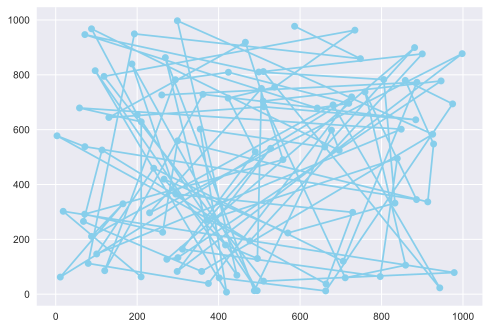

In [42]:
print_path(sorted(best), city_coordinates)

# ตัวอย่างที่ 2 

In [31]:
def better_generate_cities(n_cities, factor=0.2):
    x = np.asarray(range(int(-n_cities / 2), int(n_cities / 2) + 1, 1))
    y = np.sqrt(n_cities ** 2 / 4 - x ** 2)
    return np.asarray(list(zip(x, y)))

In [44]:
cities = range(100)
city_coordinates = better_generate_cities(len(cities))
adjacency_mat = make_mat(city_coordinates)
best, history = genetic_algorithm(
    cities, adjacency_mat, n_population=500, selectivity=0.05,
    p_mut=0.05, p_cross=0.7, n_iter=6000, print_interval=500, verbose=False, return_history=True
)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
#print(best)

Generation 0: 3124.882207423002


KeyboardInterrupt: 

In [ ]:
print_path(best, city_coordinates)

In [ ]:
print_path(sorted(best), city_coordinates)